## Python Project BAI 3A

### Project Members
#### Aqmer Ijaz 20k-1086
#### Affan Zahoor 20k-0142
#### Bilal Mamji 20k-1702

### Cleaning

In [205]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
heartd = pd.read_csv(r"C:\Users\Aqmer\PycharmProjects\pythonproject\heart.csv")
extr = heartd['RestingBP'].str.extract(r'^(\d{3})', expand=False)
heartd['RestingBP'] = pd.to_numeric(extr)
heartd['RestingBP'] = heartd['RestingBP'].fillna(round(heartd['RestingBP'].mean()))
heartd['RestingBP'] = heartd.RestingBP.astype('int64')
extr = heartd['Cholesterol'].str.extract(r'^(\d{3})', expand=False)
heartd['Cholesterol'] = pd.to_numeric(extr)
heartd['Cholesterol'] = heartd['Cholesterol'].fillna(round(heartd['Cholesterol'].mean()))
heartd['Cholesterol'] = heartd.Cholesterol.astype('int64')
extr = heartd['Age'].str.extract(r'^(\d{2})', expand=False)
heartd['Age'] = pd.to_numeric(extr)
heartd['Age'] = heartd['Age'].fillna(round(heartd['Age'].mean()))
heartd['Age'] = heartd.Age.astype('int64')
heartd['Sex'].replace({'F' : 0, 'M' : 1}, inplace = True)
heartd['ExerciseAngina'].replace({'N' : 0, 'Y' : 1}, inplace = True)
heartd['ChestPainType'].replace({'ATA' : 1, 'NAP' : 2, 'ASY' : 3,'TA' : 4}, inplace = True)
heartd['RestingECG'].replace({'Normal' : 1, 'ST' : 2, 'LVH' : 3}, inplace = True)
heartd['ST_Slope'].replace({'Up' : 1, 'Flat' : 2, 'Down' : 3}, inplace = True)

### Statistics

In [206]:
print("Statistical Data")
print(heartd.describe())
print("\n\tAge")
print("Mean:   \t",heartd['Age'].mean())
print("Median: \t",heartd['Age'].median())
print("Standard deviation: ",heartd['Age'].std())
print("Variance: \t",heartd['Age'].var())
print("Min: \t\t",heartd['Age'].min())
print("Max: \t\t",heartd['Age'].max())

print("\n\tSex")
print("Mean:   \t",heartd['Sex'].mean())

print("\n\tRestingBP")
print("Mean:   \t",heartd['RestingBP'].mean())
print("Median: \t",heartd['RestingBP'].median())
print("Standard deviation: ",heartd['RestingBP'].std())
print("Variance: \t",heartd['RestingBP'].var())
print("Min: \t\t",heartd['RestingBP'].min())
print("Max: \t\t",heartd['RestingBP'].max())

print("\n\tCholesterol")
print("Mean:   \t",heartd['Cholesterol'].mean())
print("Median: \t",heartd['Cholesterol'].median())
print("Standard deviation: ",heartd['Cholesterol'].std())
print("Variance: \t",heartd['Cholesterol'].var())
print("Min: \t\t",heartd['Cholesterol'].min())
print("Max: \t\t",heartd['Cholesterol'].max())

print("\n\tFastingBS")
print("Mean:   \t",heartd['FastingBS'].mean())

print("\n\tMaxHR")
print("Mean:   \t",heartd['MaxHR'].mean())
print("Median: \t",heartd['MaxHR'].median())
print("Standard deviation: ",heartd['MaxHR'].std())
print("Variance: \t",heartd['MaxHR'].var())
print("Min: \t\t",heartd['MaxHR'].min())
print("Max: \t\t",heartd['MaxHR'].max())

print("\n\tExerciseAngina")
print("Mean:   \t",heartd['ExerciseAngina'].mean())

print("\n\tOldpeak")
print("Mean:   \t",heartd['Oldpeak'].mean())

print("\n\tHeartDisease")
print("Mean:   \t",heartd['HeartDisease'].mean())

Statistical Data
              Age         Sex  ChestPainType   RestingBP  Cholesterol  \
count  918.000000  918.000000     918.000000  918.000000   918.000000   
mean    53.544662    0.789760       2.452070  133.088235   244.920479   
std      9.413422    0.407701       0.851832   17.383727    53.011091   
min     28.000000    0.000000       1.000000  100.000000   100.000000   
25%     47.000000    1.000000       2.000000  120.000000   215.000000   
50%     54.000000    1.000000       3.000000  130.000000   245.000000   
75%     60.000000    1.000000       3.000000  140.000000   267.000000   
max     77.000000    1.000000       4.000000  200.000000   603.000000   

        FastingBS  RestingECG       MaxHR  ExerciseAngina     Oldpeak  \
count  918.000000  918.000000  918.000000      918.000000  918.000000   
mean     0.233115    1.603486  136.809368        0.404139    0.887364   
std      0.423046    0.805968   25.460334        0.490992    1.066570   
min      0.000000    1.000000   6

In [207]:
heartd.groupby(by=['HeartDisease','Sex']).mean()

Age  ChestPainType   RestingBP  Cholesterol  \
HeartDisease Sex                                                      
0            0    51.202797       1.951049  129.153846   249.153846   
             1    50.295880       2.052434  131.453184   234.419476   
1            0    56.300000       2.740000  142.760000   272.340000   
             1    55.868996       2.810044  134.213974   246.727074   

                  FastingBS  RestingECG       MaxHR  ExerciseAngina   Oldpeak  \
HeartDisease Sex                                                                
0            0     0.069930    1.608392  149.048951        0.111888  0.435664   
             1     0.127341    1.516854  147.670412        0.146067  0.393258   
1            0     0.320000    1.700000  137.820000        0.540000  1.336000   
             1     0.336245    1.641921  126.545852        0.631004  1.267467   

                  ST_Slope  
HeartDisease Sex            
0            0    1.279720  
             1    1.250936  
1            0    1.980000  
             1    1.938865

In [208]:
heartd.groupby(by=['ChestPainType','Sex']).sum()

Age  RestingBP  Cholesterol  FastingBS  RestingECG  \
ChestPainType Sex                                                         
1             0     2975       7732        15206          5          87   
              1     5569      14945        26829         14         159   
2             0     2816       6890        13262          5          90   
              1     8006      19892        35184         36         240   
3             0     3804       9575        18424         14         124   
              1    23462      56828       105182        127         686   
4             0      542       1410         2354          2          14   
              1     1980       4903         8396         11          72   

                   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
ChestPainType Sex                                                          
1             0     9142               5     18.9        71             4  
              1    16844              12     34.3       140            20  
2             0     7872               5     22.1        73             6  
              1    21205              46    114.9       238            66  
3             0     9739              33     80.8       124            39  
              1    53986             264    495.9       782           353  
4             0     1452               0      7.3        14             1  
              1     5351               6     40.4        62            19

In [209]:
heartd.groupby(by=['RestingECG','Sex']).sum()

Age  ChestPainType  RestingBP  Cholesterol  FastingBS  \
RestingECG Sex                                                            
1          0     6093            246      15622        28909         13   
           1    22499           1063      57046       105390         98   
2          0     1403             61       3653         7010          4   
           1     8590            394      20599        36042         57   
3          0     2641            109       6332        13327          9   
           1     7928            378      18923        34159         33   

                MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
RestingECG Sex                                                          
1          0    17146              25     66.4       168            29  
           1    58645             182    367.5       712           256  
2          0     4019               7     13.5        38             7  
           1    18875              84    166.1       267           110  
3          0     7040              11     49.2        76            14  
           1    19866              62    151.9       243            92

In [210]:
heartd.groupby(by=['FastingBS','Sex']).sum()

Age  ChestPainType  RestingBP  Cholesterol  RestingECG  \
FastingBS Sex                                                             
0         0     8665            351      22047        42219         267   
          1    28313           1324      71063       129344         846   
1         0     1472             65       3560         7027          48   
          1    10704            511      25505        46247         311   

               MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
FastingBS Sex                                                          
0         0    24631              34    105.0       240            34  
          1    72981             239    497.9       872           304  
1         0     3574               9     24.1        42            16  
          1    24405              89    187.6       350           154

### Graphs

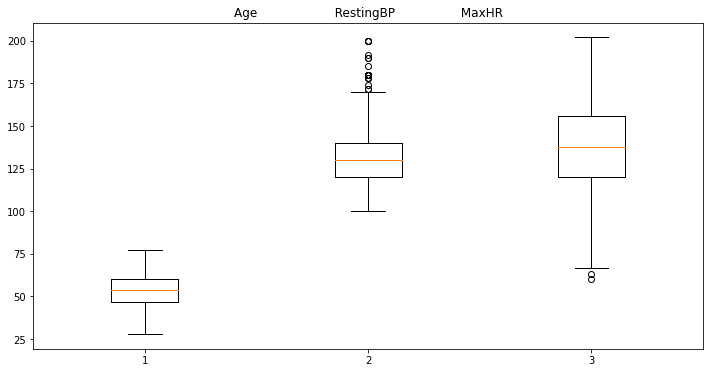

In [211]:
Age = heartd['Age']
Sex = heartd['Sex']
RestingBP = heartd['RestingBP']
Cholesterol = heartd['Cholesterol']
FastingBS = heartd['FastingBS']
MaxHR = heartd['MaxHR']
ExerciseAngina = heartd['ExerciseAngina']
Oldpeak = heartd['Oldpeak']
columns1 = [Age,RestingBP,MaxHR]
fig, ax = plt.subplots()
ax.boxplot(columns1)
ax.set_title("Age                    RestingBP                 MaxHR")
plt.show()

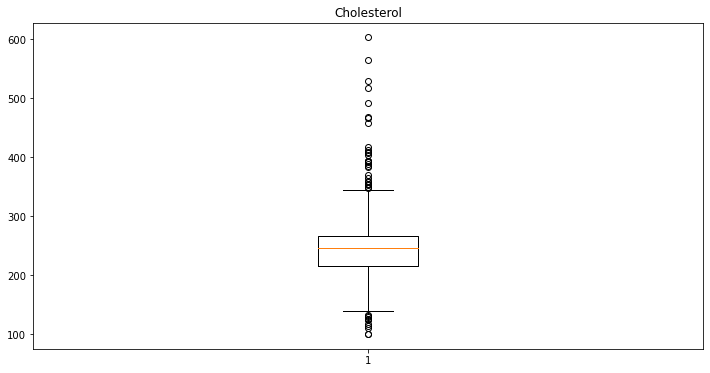

In [212]:
fig, ax = plt.subplots()
ax.boxplot(Cholesterol)
ax.set_title("Cholesterol")
plt.show()

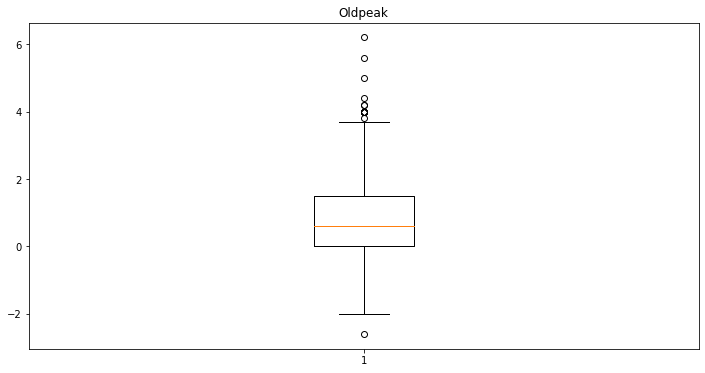

In [213]:
fig, ax = plt.subplots()
ax.boxplot(Oldpeak)
ax.set_title("Oldpeak")
plt.show()

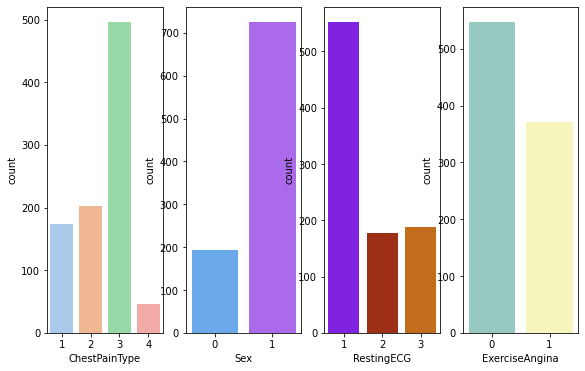

In [214]:
plt.subplot(1,5,1)
sns.countplot(heartd['ChestPainType'],palette='pastel')
plt.subplot(1,5,2)
sns.countplot(heartd['Sex'],palette='cool')
plt.subplot(1,5,3)
sns.countplot(heartd['RestingECG'],palette='gnuplot')
plt.subplot(1,5,4)
sns.countplot(heartd['ExerciseAngina'],palette='Set3')
plt.show()

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

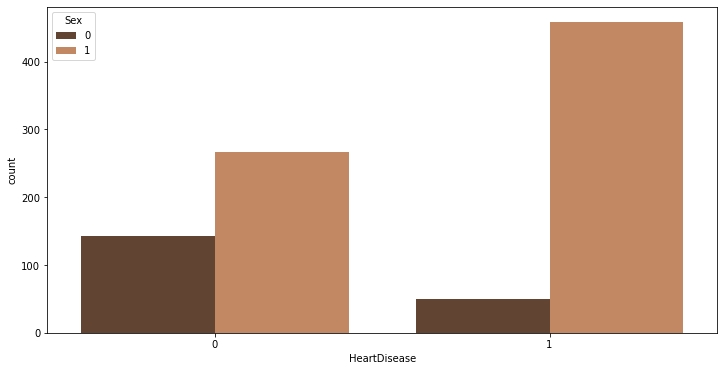

In [215]:
plt.rc('figure', figsize=(12,6))
sns.countplot(heartd['HeartDisease'],hue=heartd['Sex'],palette='copper')

<AxesSubplot:>

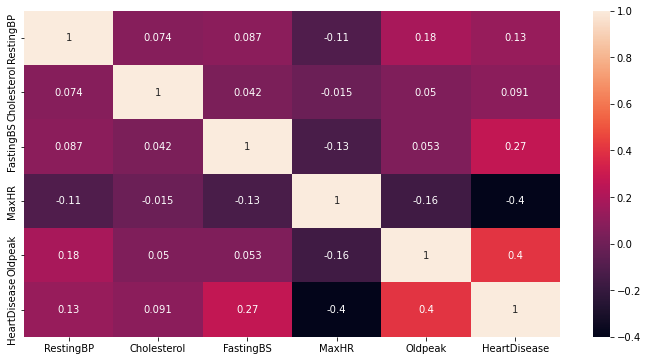

In [216]:
htmap  = heartd.drop(columns=['ChestPainType', 'RestingECG', 'ExerciseAngina','ST_Slope','Sex'], axis=1).set_index('Age')
sns.heatmap(htmap.corr(),annot=True)

### sklearn

In [217]:
heartd.groupby('HeartDisease').size()

HeartDisease
0    410
1    508
dtype: int64

In [218]:
array = heartd.values
X = array[:,0:12]
Y = array[:,11]


In [219]:
t_size = 0.40
seed = 7         
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=t_size,random_state=seed) 
print("X_train: ", X_train.shape)
print("Y_train : ", Y_train.shape)
print("X_test : ", X_test.shape)
print("Y_test : ", Y_test.shape)

X_train:  (550, 12)
Y_train :  (550,)
X_test :  (368, 12)
Y_test :  (368,)


In [220]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
print((accuracy_score(Y_test, predictions)))

0.6739130434782609


In [221]:
print((classification_report(Y_test, predictions)))
print(confusion_matrix(Y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.63      0.77      0.69       175
         1.0       0.74      0.59      0.66       193

    accuracy                           0.67       368
   macro avg       0.68      0.68      0.67       368
weighted avg       0.68      0.67      0.67       368

[[134  41]
 [ 79 114]]


In [222]:
dt = DecisionTreeClassifier( criterion='entropy', ccp_alpha = 0.015)
dt.fit(X_train, Y_train)    
predictions = dt.predict(X_test)
print((accuracy_score(Y_test, predictions)))

1.0


In [223]:
dt = DecisionTreeClassifier( criterion='gini', ccp_alpha = 0.015)   
dt.fit(X_train, Y_train) 
predictions = dt.predict(X_test) 
print((accuracy_score(Y_test, predictions)))

1.0


In [224]:
nb = GaussianNB()  
nb.fit(X_train, Y_train)     
predictions = nb.predict(X_test)  
print((accuracy_score(Y_test, predictions)))

1.0


In [225]:
X = heartd[['Age','Sex','ChestPainType','Cholesterol','RestingBP','FastingBS','RestingECG','Oldpeak','ExerciseAngina','MaxHR','ST_Slope']]
Y = heartd['HeartDisease']

In [226]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression()

In [227]:
predictedHD = regr.predict([[40,1,2,289,1,1,172,1,2,1,1]])
print(predictedHD)

[0.5879748]


In [229]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(heartd)

In [230]:
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

In [231]:
kmeans.inertia_

8587.658605058856

Text(0, 0.5, 'Inertia')

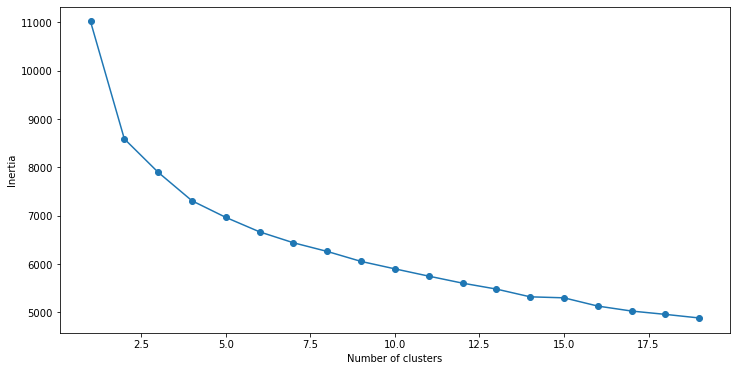

In [233]:
SSE = []   
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [234]:
kmeans = KMeans(n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [235]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

2    260
0    173
3    165
4    165
1    155
Name: cluster, dtype: int64